In [ ]:
# Dataset - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

### Importing libarires

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/content/drive/MyDrive/StudentsPerformance.csv')

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Calculating means

In [2]:
math_mean = df['math score'].mean()
math_mean

66.089

In [3]:
reading_mean = df['reading score'].mean()
reading_mean

69.169

In [4]:
df['Average_marks'] = df.mean(axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [5]:
# Hypothesis 1: An educational consultant claims that on average students receive a respectable score of 70 or more
# We add two new features - 'Average_marks' and 'Result'
# Threshold for pass, marks > 40

In [6]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Average_marks
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


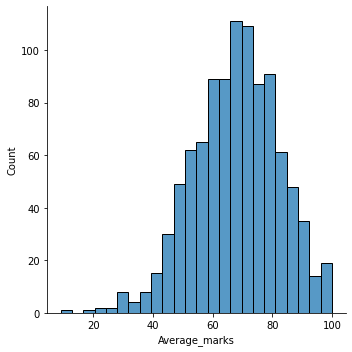

In [7]:
sns.displot(df['Average_marks'])

In [8]:
# Ho: The overall performance of students is greater than or equal to a respectable score of 70.
# Ha: The overall performance of students is less than 70.

In [9]:
x = df['Average_marks'].mean()
s = df['Average_marks'].std()

S_E = s/(1000**0.5)
t_stat = (x-70)/(S_E)

print('The t_stat of this test is: ', t_stat)

The t_stat of this test is:  -4.944665643928837


[]

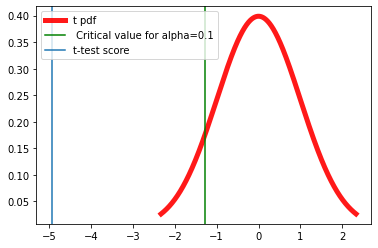

In [11]:
from scipy.stats import t
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1)
dof = 999

x = np.linspace(t.ppf(0.01, dof), t.ppf(0.99, dof), 1000)
ax.plot(x, t.pdf(x, dof), 'r-', lw=5, alpha=0.9, label = "t pdf")

plt.axvline(x=t.ppf(0.1,dof), label=' Critical value for alpha=0.1', color='g')
plt.axvline(t_stat, label='t-test score')
plt.legend()
plt.plot()

In [17]:
import scipy.stats as stats

print(stats.ttest_1samp(df['Average_marks'], 70))
p_value_1_tailed = stats.ttest_1samp(df['Average_marks'], 70)[1]/2
print('p value for one-sided t test is: ', p_value_1_tailed)

Ttest_1sampResult(statistic=-4.944665643928837, pvalue=8.942878479352005e-07)
p value for one-sided t test is:  4.4714392396760026e-07


In [ ]:
# Because the p value is smaller than 0.1, it provides sufficiently strong evidence to reject the null hypothesis in favor of the alternative.